In [1]:
#a toy example of convolutional neural network
#code written on python3.5 using only numpy for forward and backward passes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 9]

image = np.array([
    [1, 2, 3, 4, 5, 6],
    [7, 8, 9, 10,11,12],
    [13,14,15,16,17,18],
    [13,14,15,16,17,18],
    [7, 8, 9, 10,11,12],
    [1, 2, 3, 4, 5, 6]])

y = 10

learning_rate = 0.001

np.random.seed(1234)
kernel = 2*np.random.random((5, 5)) - 1

In [2]:
def conv_forw(image, kernel):
    output = np.zeros([image.shape[0]-kernel.shape[0]+1, image.shape[1]-kernel.shape[1]+1])
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            part_of_the_image = image[i:kernel.shape[0]+i, j:kernel.shape[1]+j]
            #print('kernel part:', '\n', part_of_the_image)
            output[i,j] = (np.multiply(part_of_the_image, kernel)).sum()

    return output

def conv_back(image, kernel):
    #rotate kernel by 180 degrees for backpropagation 
    kernel = np.flip(kernel, axis=1)
    kernel = np.flip(kernel, axis=0)
    image_zeros = np.zeros([image.shape[0]+kernel.shape[0]*2-2, image.shape[1]+kernel.shape[1]*2-2])
    #zero padding of input image around the border for valid backpropagation of conv layer
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_zeros[i+kernel.shape[0]-1, j+kernel.shape[1]-1] = image[i,j]
    image = image_zeros
    output = conv_forw(image, kernel)
    return output

def maxpooling(image):
    heigh = 2
    width = 2

    #zero padding
    if image.shape[0]%heigh != 0:
        image_padded_heigh = (image.shape[0]//heigh)*heigh + heigh
    else:
        image_padded_heigh = (image.shape[0]//heigh)*heigh

    if image.shape[1]%width != 0:
        image_padded_width = (image.shape[1]//width)*width + width
    else:
        image_padded_width = (image.shape[1]//width)*width

    image_padded = np.zeros([image_padded_heigh, image_padded_width])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_padded[i, j] = image[i,j]

    #maxpooling
    image_back = np.zeros([image_padded_heigh, image_padded_width])
    output = np.zeros([int(image_padded_heigh/heigh), int(image_padded_width/width)])
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            part_of_the_image = image_padded[i*heigh:i*heigh+heigh, j*width:j*width+width]
            output[i,j] = (np.max(part_of_the_image))
            #index of maximum value for backprop
            max_index = np.unravel_index(part_of_the_image.argmax(), part_of_the_image.shape)
            image_back[max_index[0]+i*heigh, max_index[1]+j*width] = 1
    return output, image_back

#need to change to leaky relu
def relu_forw(image):
    output = np.copy(image)
    output[output<0]=0
    return output

def relu_back(image):
    output = np.copy(image)
    output[output<=0]=0
    output[output>0]=1
    return output

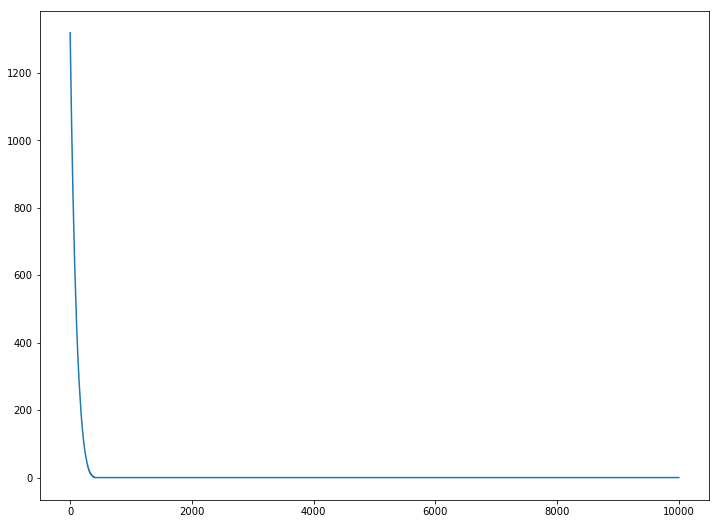

error total: -0.004250398520801113


In [3]:
#forward and backward passes
error = []
for i in range(10000):
    conv_forw_result = conv_forw(image, kernel)
    #print('convolution feedforward result', '\n', conv_forw_result)

    relu_forw_result = relu_forw(conv_forw_result)
    #print('relu feedforward result', '\n', relu_forw_result)

    maxpool_forw_result, maxpool_back_result = maxpooling(relu_forw_result)
    #print('maxpooling feedforward result', '\n', maxpool_forw_result)
    #print('maxpooling backprop result', '\n', maxpool_back_result)

    error_total = (maxpool_forw_result-y)**2
    error.append(int(error_total))

    backprop = learning_rate*maxpool_back_result*(maxpool_forw_result-y)

    backprop = learning_rate*relu_forw_result*backprop

    relu_back_result = relu_back(backprop)

    backprop = learning_rate*relu_back_result*conv_forw_result

    kernel_back = conv_forw(image, backprop)

    kernel = kernel - learning_rate*kernel_back

plt.plot(error)
plt.show()
print('error total:', float(maxpool_forw_result-y))

#for later, ad second conv layer
#conv_back_result = conv_back(_, kernel)
#print('convolution backward result', '\n', conv_back_result)